In [3]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.



  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached mediapipe-0.8.10.1-cp39-cp39-win_amd64.whl (48.7 MB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh # Face mesh

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [163]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [164]:
draw_landmarks(frame, results)

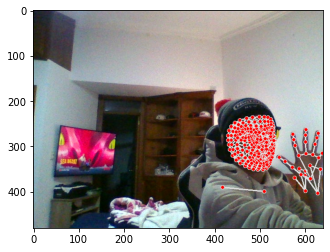

In [165]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [166]:
len(results.left_hand_landmarks.landmark)

21

In [167]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [168]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [169]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [171]:
result_test = extract_keypoints(results)

In [172]:
result_test

array([ 0.80600786,  0.60660797, -0.5472405 , ...,  1.01482177,
        0.6525746 , -0.04365777])

# 4. Folders for collections

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Como te sientes', 'Quien me puede Ayudar', 'Por Favor, necesito informacion'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 60

# Folder start
start_folder = 30

In [16]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoints Values for Training and Testing

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [18]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'Como te sientes': 0,
 'Quien me puede Ayudar': 1,
 'Por Favor, necesito informacion': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 60, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 60, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [45]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(60,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
res = [.7, 0.2, 0.1]

In [42]:
actions[np.argmax(res)]

'Como te sientes'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])

Epoch 1/1500
3/3 [==============================] - 7s 2s/step - loss: 62.2429 - categorical_accuracy: 0.3412
Epoch 2/1500
3/3 [==============================] - 0s 126ms/step - loss: 23.8397 - categorical_accuracy: 0.3647
Epoch 3/1500
3/3 [==============================] - 0s 131ms/step - loss: 105.7688 - categorical_accuracy: 0.3294
Epoch 4/1500
3/3 [==============================] - 0s 129ms/step - loss: 441.6017 - categorical_accuracy: 0.2941
Epoch 5/1500
3/3 [==============================] - 0s 129ms/step - loss: 320.8080 - categorical_accuracy: 0.2588
Epoch 6/1500
3/3 [==============================] - 0s 128ms/step - loss: 65.0586 - categorical_accuracy: 0.3882
Epoch 7/1500
3/3 [==============================] - 0s 131ms/step - loss: 1291.0675 - categorical_accuracy: 0.3647
Epoch 8/1500
3/3 [==============================] - 0s 133ms/step - loss: 388.4943 - categorical_accuracy: 0.3647
Epoch 9/1500
3/3 [==============================] - 0s 120ms/step - loss: 727.0952 - categori

3/3 [==============================] - 0s 135ms/step - loss: 13507.9502 - categorical_accuracy: 0.2588
Epoch 72/1500
3/3 [==============================] - 0s 136ms/step - loss: 14343.0850 - categorical_accuracy: 0.3059
Epoch 73/1500
3/3 [==============================] - 0s 137ms/step - loss: 12139.8438 - categorical_accuracy: 0.3529
Epoch 74/1500
3/3 [==============================] - 0s 143ms/step - loss: 9003.7959 - categorical_accuracy: 0.4118
Epoch 75/1500
3/3 [==============================] - 0s 137ms/step - loss: 16437.9668 - categorical_accuracy: 0.3412
Epoch 76/1500
3/3 [==============================] - 0s 143ms/step - loss: 30775.1992 - categorical_accuracy: 0.2941
Epoch 77/1500
3/3 [==============================] - 0s 134ms/step - loss: 31473.4199 - categorical_accuracy: 0.3765
Epoch 78/1500
3/3 [==============================] - 0s 131ms/step - loss: 39301.2578 - categorical_accuracy: 0.4235
Epoch 79/1500
3/3 [==============================] - 0s 133ms/step - loss: 1547

3/3 [==============================] - 0s 129ms/step - loss: 4571.3545 - categorical_accuracy: 0.3765
Epoch 142/1500
3/3 [==============================] - 0s 128ms/step - loss: 4175.4160 - categorical_accuracy: 0.3765
Epoch 143/1500
3/3 [==============================] - 0s 129ms/step - loss: 3873.7559 - categorical_accuracy: 0.2824
Epoch 144/1500
3/3 [==============================] - 0s 129ms/step - loss: 3141.4639 - categorical_accuracy: 0.4471
Epoch 145/1500
3/3 [==============================] - 0s 129ms/step - loss: 5579.3574 - categorical_accuracy: 0.2235
Epoch 146/1500
3/3 [==============================] - 0s 137ms/step - loss: 4874.1914 - categorical_accuracy: 0.2471
Epoch 147/1500
3/3 [==============================] - 0s 129ms/step - loss: 5313.0894 - categorical_accuracy: 0.2941
Epoch 148/1500
3/3 [==============================] - 0s 133ms/step - loss: 4314.5103 - categorical_accuracy: 0.4000
Epoch 149/1500
3/3 [==============================] - 0s 135ms/step - loss: 418

Epoch 211/1500
3/3 [==============================] - 0s 128ms/step - loss: 9376.0996 - categorical_accuracy: 0.4000
Epoch 212/1500
3/3 [==============================] - 0s 141ms/step - loss: 10650.1895 - categorical_accuracy: 0.3647
Epoch 213/1500
3/3 [==============================] - 0s 141ms/step - loss: 8760.8262 - categorical_accuracy: 0.3294
Epoch 214/1500
3/3 [==============================] - 0s 134ms/step - loss: 13003.6973 - categorical_accuracy: 0.3412
Epoch 215/1500
3/3 [==============================] - 0s 130ms/step - loss: 10114.8975 - categorical_accuracy: 0.3529
Epoch 216/1500
3/3 [==============================] - 0s 131ms/step - loss: 10040.6396 - categorical_accuracy: 0.3529
Epoch 217/1500
3/3 [==============================] - 0s 131ms/step - loss: 7558.8823 - categorical_accuracy: 0.3882
Epoch 218/1500
3/3 [==============================] - 0s 131ms/step - loss: 8513.4033 - categorical_accuracy: 0.3882
Epoch 219/1500
3/3 [==============================] - 0s 132

3/3 [==============================] - 0s 131ms/step - loss: 1227.0887 - categorical_accuracy: 0.4000
Epoch 282/1500
3/3 [==============================] - 0s 131ms/step - loss: 1130.7098 - categorical_accuracy: 0.2824
Epoch 283/1500
3/3 [==============================] - 0s 133ms/step - loss: 1594.1577 - categorical_accuracy: 0.3059
Epoch 284/1500
3/3 [==============================] - 0s 134ms/step - loss: 1172.4996 - categorical_accuracy: 0.3176
Epoch 285/1500
3/3 [==============================] - 0s 134ms/step - loss: 1151.1840 - categorical_accuracy: 0.3765
Epoch 286/1500
3/3 [==============================] - 0s 132ms/step - loss: 613.4675 - categorical_accuracy: 0.3647
Epoch 287/1500
3/3 [==============================] - 0s 134ms/step - loss: 802.1744 - categorical_accuracy: 0.4588
Epoch 288/1500
3/3 [==============================] - 0s 132ms/step - loss: 954.0479 - categorical_accuracy: 0.3529
Epoch 289/1500
3/3 [==============================] - 0s 134ms/step - loss: 739.04

3/3 [==============================] - 0s 161ms/step - loss: 1213.0787 - categorical_accuracy: 0.3059
Epoch 352/1500
3/3 [==============================] - 0s 139ms/step - loss: 1128.9498 - categorical_accuracy: 0.3765
Epoch 353/1500
3/3 [==============================] - 0s 135ms/step - loss: 1091.8533 - categorical_accuracy: 0.3412
Epoch 354/1500
3/3 [==============================] - 0s 133ms/step - loss: 1069.6274 - categorical_accuracy: 0.3529
Epoch 355/1500
3/3 [==============================] - 0s 133ms/step - loss: 1070.9069 - categorical_accuracy: 0.3176
Epoch 356/1500
3/3 [==============================] - 0s 140ms/step - loss: 1192.8129 - categorical_accuracy: 0.3059
Epoch 357/1500
3/3 [==============================] - 0s 134ms/step - loss: 771.1513 - categorical_accuracy: 0.3882
Epoch 358/1500
3/3 [==============================] - 0s 133ms/step - loss: 872.0799 - categorical_accuracy: 0.3529
Epoch 359/1500
3/3 [==============================] - 0s 134ms/step - loss: 1619.

3/3 [==============================] - 0s 139ms/step - loss: 3020.7092 - categorical_accuracy: 0.3059
Epoch 422/1500
3/3 [==============================] - 0s 147ms/step - loss: 1817.9647 - categorical_accuracy: 0.3647
Epoch 423/1500
3/3 [==============================] - 0s 144ms/step - loss: 2939.6790 - categorical_accuracy: 0.3765
Epoch 424/1500
3/3 [==============================] - 0s 141ms/step - loss: 1328.7874 - categorical_accuracy: 0.2706
Epoch 425/1500
3/3 [==============================] - 0s 139ms/step - loss: 1753.6028 - categorical_accuracy: 0.3294
Epoch 426/1500
3/3 [==============================] - 0s 132ms/step - loss: 1743.3680 - categorical_accuracy: 0.2118
Epoch 427/1500
3/3 [==============================] - 0s 135ms/step - loss: 1293.6642 - categorical_accuracy: 0.3765
Epoch 428/1500
3/3 [==============================] - 0s 133ms/step - loss: 1257.9585 - categorical_accuracy: 0.3176
Epoch 429/1500
3/3 [==============================] - 0s 132ms/step - loss: 241

3/3 [==============================] - 0s 144ms/step - loss: 3334.0842 - categorical_accuracy: 0.3176
Epoch 492/1500
3/3 [==============================] - 0s 143ms/step - loss: 3461.0173 - categorical_accuracy: 0.3412
Epoch 493/1500
3/3 [==============================] - 0s 141ms/step - loss: 4136.6499 - categorical_accuracy: 0.2588
Epoch 494/1500
3/3 [==============================] - 0s 144ms/step - loss: 2604.4983 - categorical_accuracy: 0.3059
Epoch 495/1500
3/3 [==============================] - 0s 146ms/step - loss: 1297.3888 - categorical_accuracy: 0.3412
Epoch 496/1500
3/3 [==============================] - 0s 143ms/step - loss: 2458.9082 - categorical_accuracy: 0.3059
Epoch 497/1500
3/3 [==============================] - 0s 142ms/step - loss: 2799.8865 - categorical_accuracy: 0.2941
Epoch 498/1500
3/3 [==============================] - 0s 139ms/step - loss: 2388.3750 - categorical_accuracy: 0.4118
Epoch 499/1500
3/3 [==============================] - 0s 136ms/step - loss: 353

3/3 [==============================] - 0s 143ms/step - loss: 2322.5220 - categorical_accuracy: 0.3765
Epoch 561/1500
3/3 [==============================] - 0s 145ms/step - loss: 1987.0382 - categorical_accuracy: 0.4353
Epoch 562/1500
3/3 [==============================] - 0s 143ms/step - loss: 2127.5530 - categorical_accuracy: 0.4471
Epoch 563/1500
3/3 [==============================] - 0s 145ms/step - loss: 3316.4766 - categorical_accuracy: 0.4353
Epoch 564/1500
3/3 [==============================] - 0s 144ms/step - loss: 3701.0137 - categorical_accuracy: 0.3412
Epoch 565/1500
3/3 [==============================] - 0s 140ms/step - loss: 4520.7930 - categorical_accuracy: 0.2941
Epoch 566/1500
3/3 [==============================] - 0s 143ms/step - loss: 3042.5115 - categorical_accuracy: 0.3294
Epoch 567/1500
3/3 [==============================] - 0s 146ms/step - loss: 2491.6616 - categorical_accuracy: 0.2824
Epoch 568/1500
3/3 [==============================] - 0s 142ms/step - loss: 248

3/3 [==============================] - 0s 132ms/step - loss: 1203.8976 - categorical_accuracy: 0.3765
Epoch 631/1500
3/3 [==============================] - 0s 132ms/step - loss: 1601.2550 - categorical_accuracy: 0.2824
Epoch 632/1500
3/3 [==============================] - 0s 134ms/step - loss: 1514.0734 - categorical_accuracy: 0.2941
Epoch 633/1500
3/3 [==============================] - 0s 139ms/step - loss: 875.5276 - categorical_accuracy: 0.3529
Epoch 634/1500
3/3 [==============================] - 0s 140ms/step - loss: 1072.6508 - categorical_accuracy: 0.3059
Epoch 635/1500
3/3 [==============================] - 0s 141ms/step - loss: 1446.5381 - categorical_accuracy: 0.3294
Epoch 636/1500
3/3 [==============================] - 0s 141ms/step - loss: 3233.6353 - categorical_accuracy: 0.2824
Epoch 637/1500
3/3 [==============================] - 0s 143ms/step - loss: 1453.0707 - categorical_accuracy: 0.2941
Epoch 638/1500
3/3 [==============================] - 0s 140ms/step - loss: 1287

3/3 [==============================] - 0s 140ms/step - loss: 435.4370 - categorical_accuracy: 0.3647
Epoch 701/1500
3/3 [==============================] - 0s 136ms/step - loss: 558.8022 - categorical_accuracy: 0.4118
Epoch 702/1500
3/3 [==============================] - 0s 135ms/step - loss: 1028.7944 - categorical_accuracy: 0.3529
Epoch 703/1500
3/3 [==============================] - 0s 135ms/step - loss: 1308.3390 - categorical_accuracy: 0.2706
Epoch 704/1500
3/3 [==============================] - 0s 143ms/step - loss: 1375.0731 - categorical_accuracy: 0.3882
Epoch 705/1500
3/3 [==============================] - 0s 146ms/step - loss: 1066.3168 - categorical_accuracy: 0.3176
Epoch 706/1500
3/3 [==============================] - 0s 139ms/step - loss: 1213.2742 - categorical_accuracy: 0.2824
Epoch 707/1500
3/3 [==============================] - 0s 151ms/step - loss: 991.0787 - categorical_accuracy: 0.3882
Epoch 708/1500
3/3 [==============================] - 0s 154ms/step - loss: 1135.3

3/3 [==============================] - 0s 134ms/step - loss: 359.4241 - categorical_accuracy: 0.2824
Epoch 771/1500
3/3 [==============================] - 0s 134ms/step - loss: 369.3220 - categorical_accuracy: 0.3176
Epoch 772/1500
3/3 [==============================] - 0s 133ms/step - loss: 521.2298 - categorical_accuracy: 0.3412
Epoch 773/1500
3/3 [==============================] - 0s 131ms/step - loss: 605.8593 - categorical_accuracy: 0.2824
Epoch 774/1500
3/3 [==============================] - 0s 134ms/step - loss: 530.1119 - categorical_accuracy: 0.4353
Epoch 775/1500
3/3 [==============================] - 0s 134ms/step - loss: 584.7368 - categorical_accuracy: 0.2588
Epoch 776/1500
3/3 [==============================] - 0s 132ms/step - loss: 522.7986 - categorical_accuracy: 0.3647
Epoch 777/1500
3/3 [==============================] - 0s 130ms/step - loss: 337.6443 - categorical_accuracy: 0.3529
Epoch 778/1500
3/3 [==============================] - 0s 129ms/step - loss: 428.9442 - 

3/3 [==============================] - 0s 135ms/step - loss: 347.3951 - categorical_accuracy: 0.2588
Epoch 841/1500
3/3 [==============================] - 0s 132ms/step - loss: 216.6088 - categorical_accuracy: 0.3529
Epoch 842/1500
3/3 [==============================] - 0s 128ms/step - loss: 242.4519 - categorical_accuracy: 0.4118
Epoch 843/1500
3/3 [==============================] - 0s 135ms/step - loss: 175.4610 - categorical_accuracy: 0.2588
Epoch 844/1500
3/3 [==============================] - 0s 134ms/step - loss: 156.9370 - categorical_accuracy: 0.2941
Epoch 845/1500
3/3 [==============================] - 0s 132ms/step - loss: 200.4302 - categorical_accuracy: 0.3647
Epoch 846/1500
3/3 [==============================] - 0s 132ms/step - loss: 152.4027 - categorical_accuracy: 0.3294
Epoch 847/1500
3/3 [==============================] - 0s 133ms/step - loss: 145.6261 - categorical_accuracy: 0.3529
Epoch 848/1500
3/3 [==============================] - 0s 132ms/step - loss: 242.5459 - 

3/3 [==============================] - 0s 135ms/step - loss: 386.7941 - categorical_accuracy: 0.4118
Epoch 911/1500
3/3 [==============================] - 0s 133ms/step - loss: 207.3900 - categorical_accuracy: 0.4353
Epoch 912/1500
3/3 [==============================] - 0s 136ms/step - loss: 295.6196 - categorical_accuracy: 0.2941
Epoch 913/1500
3/3 [==============================] - 0s 135ms/step - loss: 400.1090 - categorical_accuracy: 0.3176
Epoch 914/1500
3/3 [==============================] - 0s 137ms/step - loss: 253.2433 - categorical_accuracy: 0.3647
Epoch 915/1500
3/3 [==============================] - 0s 134ms/step - loss: 477.3584 - categorical_accuracy: 0.3412
Epoch 916/1500
3/3 [==============================] - 0s 137ms/step - loss: 203.6732 - categorical_accuracy: 0.3059
Epoch 917/1500
3/3 [==============================] - 0s 132ms/step - loss: 212.4971 - categorical_accuracy: 0.3882
Epoch 918/1500
3/3 [==============================] - 0s 131ms/step - loss: 283.0010 - 

3/3 [==============================] - 0s 138ms/step - loss: 95.1613 - categorical_accuracy: 0.3176
Epoch 981/1500
3/3 [==============================] - 0s 135ms/step - loss: 87.4365 - categorical_accuracy: 0.3647
Epoch 982/1500
3/3 [==============================] - 0s 133ms/step - loss: 224.1945 - categorical_accuracy: 0.2941
Epoch 983/1500
3/3 [==============================] - 0s 130ms/step - loss: 205.1887 - categorical_accuracy: 0.2824
Epoch 984/1500
3/3 [==============================] - 0s 131ms/step - loss: 208.0326 - categorical_accuracy: 0.3059
Epoch 985/1500
3/3 [==============================] - 0s 132ms/step - loss: 157.4484 - categorical_accuracy: 0.2824
Epoch 986/1500
3/3 [==============================] - 0s 134ms/step - loss: 165.9065 - categorical_accuracy: 0.2824
Epoch 987/1500
3/3 [==============================] - 0s 134ms/step - loss: 233.7100 - categorical_accuracy: 0.2824
Epoch 988/1500
3/3 [==============================] - 0s 130ms/step - loss: 152.8528 - ca

3/3 [==============================] - 0s 151ms/step - loss: 124.0946 - categorical_accuracy: 0.3765
Epoch 1051/1500
3/3 [==============================] - 0s 143ms/step - loss: 103.7330 - categorical_accuracy: 0.2706
Epoch 1052/1500
3/3 [==============================] - 0s 145ms/step - loss: 140.3550 - categorical_accuracy: 0.3529
Epoch 1053/1500
3/3 [==============================] - 0s 132ms/step - loss: 128.7990 - categorical_accuracy: 0.4118
Epoch 1054/1500
3/3 [==============================] - 0s 133ms/step - loss: 191.4526 - categorical_accuracy: 0.2824
Epoch 1055/1500
3/3 [==============================] - 0s 132ms/step - loss: 183.1156 - categorical_accuracy: 0.3765
Epoch 1056/1500
3/3 [==============================] - 0s 137ms/step - loss: 193.8627 - categorical_accuracy: 0.3529
Epoch 1057/1500
3/3 [==============================] - 0s 135ms/step - loss: 244.5053 - categorical_accuracy: 0.3765
Epoch 1058/1500
3/3 [==============================] - 0s 137ms/step - loss: 123

3/3 [==============================] - 0s 152ms/step - loss: 145.7409 - categorical_accuracy: 0.4471
Epoch 1121/1500
3/3 [==============================] - 0s 134ms/step - loss: 104.4537 - categorical_accuracy: 0.3765
Epoch 1122/1500
3/3 [==============================] - 0s 128ms/step - loss: 151.5368 - categorical_accuracy: 0.4235
Epoch 1123/1500
3/3 [==============================] - 0s 134ms/step - loss: 127.7853 - categorical_accuracy: 0.3176
Epoch 1124/1500
3/3 [==============================] - 0s 134ms/step - loss: 118.1895 - categorical_accuracy: 0.4000
Epoch 1125/1500
3/3 [==============================] - 0s 133ms/step - loss: 151.2797 - categorical_accuracy: 0.2588
Epoch 1126/1500
3/3 [==============================] - 0s 144ms/step - loss: 132.3097 - categorical_accuracy: 0.4000
Epoch 1127/1500
3/3 [==============================] - 0s 141ms/step - loss: 122.8890 - categorical_accuracy: 0.3176
Epoch 1128/1500
3/3 [==============================] - 0s 153ms/step - loss: 136

3/3 [==============================] - 0s 142ms/step - loss: 301.2796 - categorical_accuracy: 0.2588
Epoch 1191/1500
3/3 [==============================] - 0s 143ms/step - loss: 339.4062 - categorical_accuracy: 0.3529
Epoch 1192/1500
3/3 [==============================] - 0s 145ms/step - loss: 296.3181 - categorical_accuracy: 0.4235
Epoch 1193/1500
3/3 [==============================] - 0s 144ms/step - loss: 364.9131 - categorical_accuracy: 0.3412
Epoch 1194/1500
3/3 [==============================] - 0s 134ms/step - loss: 242.3483 - categorical_accuracy: 0.3059
Epoch 1195/1500
3/3 [==============================] - 0s 133ms/step - loss: 279.6971 - categorical_accuracy: 0.4000
Epoch 1196/1500
3/3 [==============================] - 0s 146ms/step - loss: 180.1542 - categorical_accuracy: 0.3529
Epoch 1197/1500
3/3 [==============================] - 0s 145ms/step - loss: 281.1221 - categorical_accuracy: 0.3412
Epoch 1198/1500
3/3 [==============================] - 0s 142ms/step - loss: 156

3/3 [==============================] - 0s 141ms/step - loss: 140.2087 - categorical_accuracy: 0.4000
Epoch 1261/1500
3/3 [==============================] - 0s 141ms/step - loss: 110.8763 - categorical_accuracy: 0.3647
Epoch 1262/1500
3/3 [==============================] - 0s 141ms/step - loss: 136.2139 - categorical_accuracy: 0.3176
Epoch 1263/1500
3/3 [==============================] - 0s 142ms/step - loss: 113.2236 - categorical_accuracy: 0.3529
Epoch 1264/1500
3/3 [==============================] - 0s 146ms/step - loss: 123.3234 - categorical_accuracy: 0.3412
Epoch 1265/1500
3/3 [==============================] - 1s 162ms/step - loss: 83.3106 - categorical_accuracy: 0.2941
Epoch 1266/1500
3/3 [==============================] - 1s 167ms/step - loss: 70.6084 - categorical_accuracy: 0.3765
Epoch 1267/1500
3/3 [==============================] - 0s 150ms/step - loss: 70.3695 - categorical_accuracy: 0.2588
Epoch 1268/1500
3/3 [==============================] - 0s 147ms/step - loss: 88.703

3/3 [==============================] - 0s 141ms/step - loss: 171.0037 - categorical_accuracy: 0.3882
Epoch 1331/1500
3/3 [==============================] - 0s 140ms/step - loss: 131.2975 - categorical_accuracy: 0.3647
Epoch 1332/1500
3/3 [==============================] - 0s 138ms/step - loss: 174.2805 - categorical_accuracy: 0.4118
Epoch 1333/1500
3/3 [==============================] - 0s 140ms/step - loss: 139.4225 - categorical_accuracy: 0.3647
Epoch 1334/1500
3/3 [==============================] - 0s 141ms/step - loss: 103.5014 - categorical_accuracy: 0.4000
Epoch 1335/1500
3/3 [==============================] - 0s 138ms/step - loss: 210.0307 - categorical_accuracy: 0.3529
Epoch 1336/1500
3/3 [==============================] - 0s 139ms/step - loss: 97.7955 - categorical_accuracy: 0.4118
Epoch 1337/1500
3/3 [==============================] - 0s 142ms/step - loss: 272.5811 - categorical_accuracy: 0.3412
Epoch 1338/1500
3/3 [==============================] - 0s 143ms/step - loss: 391.

3/3 [==============================] - 0s 133ms/step - loss: 151.3731 - categorical_accuracy: 0.4235
Epoch 1401/1500
3/3 [==============================] - 0s 134ms/step - loss: 166.5527 - categorical_accuracy: 0.3412
Epoch 1402/1500
3/3 [==============================] - 0s 132ms/step - loss: 145.6200 - categorical_accuracy: 0.4118
Epoch 1403/1500
3/3 [==============================] - 0s 138ms/step - loss: 152.3845 - categorical_accuracy: 0.3647
Epoch 1404/1500
3/3 [==============================] - 0s 142ms/step - loss: 156.8409 - categorical_accuracy: 0.4235
Epoch 1405/1500
3/3 [==============================] - 0s 134ms/step - loss: 170.3250 - categorical_accuracy: 0.3765
Epoch 1406/1500
3/3 [==============================] - 0s 137ms/step - loss: 172.8826 - categorical_accuracy: 0.4118
Epoch 1407/1500
3/3 [==============================] - 0s 139ms/step - loss: 133.4859 - categorical_accuracy: 0.4588
Epoch 1408/1500
3/3 [==============================] - 0s 140ms/step - loss: 280

3/3 [==============================] - 0s 131ms/step - loss: 44.7889 - categorical_accuracy: 0.5176
Epoch 1471/1500
3/3 [==============================] - 0s 135ms/step - loss: 69.6476 - categorical_accuracy: 0.4235
Epoch 1472/1500
3/3 [==============================] - 0s 133ms/step - loss: 129.6076 - categorical_accuracy: 0.2824
Epoch 1473/1500
3/3 [==============================] - 0s 137ms/step - loss: 78.7277 - categorical_accuracy: 0.4118
Epoch 1474/1500
3/3 [==============================] - 0s 142ms/step - loss: 195.7819 - categorical_accuracy: 0.3294
Epoch 1475/1500
3/3 [==============================] - 0s 152ms/step - loss: 148.6777 - categorical_accuracy: 0.2471
Epoch 1476/1500
3/3 [==============================] - 0s 144ms/step - loss: 86.9113 - categorical_accuracy: 0.5294
Epoch 1477/1500
3/3 [==============================] - 0s 147ms/step - loss: 84.6355 - categorical_accuracy: 0.3529
Epoch 1478/1500
3/3 [==============================] - 0s 144ms/step - loss: 116.6986

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                660       
Total params: 597,236
Trainable params: 597,236
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [66]:
res = model.predict(X_test)

In [67]:
actions[np.argmax(res[4])]

'Informacion'

In [68]:
actions[np.argmax(y_test[4])]

'Informacion'

# 9. Save Weights

In [69]:
model.save('action.h5')

In [39]:
del model

In [72]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [73]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [74]:
yhat = model.predict(X_test)

In [75]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[28,  0],
        [ 0,  2]],

       [[29,  1],
        [ 0,  0]],

       [[26,  0],
        [ 1,  3]],

       [[28,  0],
        [ 0,  2]],

       [[27,  1],
        [ 0,  2]],

       [[28,  0],
        [ 0,  2]],

       [[27,  0],
        [ 0,  3]],

       [[28,  0],
        [ 1,  1]],

       [[28,  1],
        [ 0,  1]],

       [[28,  2],
        [ 0,  0]],

       [[27,  0],
        [ 0,  3]],

       [[27,  0],
        [ 3,  0]],

       [[28,  0],
        [ 0,  2]],

       [[29,  1],
        [ 0,  0]],

       [[29,  0],
        [ 1,  0]],

       [[27,  0],
        [ 0,  3]]], dtype=int64)

In [77]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [78]:
from scipy import stats
from random import randint

In [79]:
#colors = [(245,117,16), (117,245,16), (16,117,245), (randint(0, 255), randint(0, 255), randint(0, 255)), (randint(0, 255), randint(0, 255), randint(0, 255)), (randint(0, 255), randint(0, 255), randint(0, 255)), (randint(0, 255), randint(0, 255), randint(0, 255)), (randint(0, 255), randint(0, 255), randint(0, 255))]
colors = []
for i in range(len(actions)):
    colors.append((randint(0, 255), randint(0, 255), randint(0, 255)))
    
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

<Figure size 1296x1296 with 0 Axes>

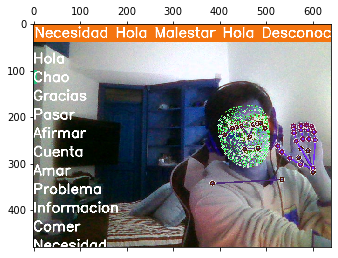

In [251]:
plt.figure(figsize=(18,18))
plt.matshow(prob_viz(res, actions, image, colors))

In [87]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0, apiPreference=cv2.CAP_ANY, params=[cv2.CAP_PROP_FRAME_WIDTH, 1920, cv2.CAP_PROP_FRAME_HEIGHT, 1200])
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
        
        #cv2.resize(image, (1280, 960))
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #Resize Window if needed
        #cv2.namedWindow('OpenCV Feed', cv2.WINDOW_NORMAL)
        #cv2.resizeWindow('OpenCV Feed', 1200, 800)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.Soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.

Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe

Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.

Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar


Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'medi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapi

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'media

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Nec

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'media

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.

Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
llamar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Com

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.pytho

Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.pytho

Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.Soluti

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'me

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desca

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desca

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desca

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutpu

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desca

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desca

Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.sol

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<c

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_b

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class '

Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabaja

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_b

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Amar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Danar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.s

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cedula
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.so

Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<clas

Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<cl

Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Factura
<class 'mediapipe.python.solution

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ch

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapi

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapi

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<cla

Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
D

Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_

Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.Solu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cuenta
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Afirmar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Problema
<class 'mediapipe.python.solution_bas

Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Terminar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
llamar
<cl

Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Gracias
<class 'mediapipe.python.soluti

Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Pasar
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Neces

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Neces

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutpu

Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.pyth

Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.pyth

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Chao
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Descansar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Trabajar
<class 'media

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Neces

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Comer
<class 'mediapipe.python.solution_base.Solutio

Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutpu

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Neces

Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Desconocido
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hola
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Malestar
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Informacion
<class 'mediapipe.python.solution_base.Solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Necesidad
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Neces

# 12. Export Model to TensorflowJS